In [3]:
import numpy as np
from TimeTagger import *
import time
import datetime
import os

In [4]:
tagger = createTimeTagger()

In [5]:
SPAD_CH = 1 # SPAD Channel
TRIG_CH = 3 # Trigger Channel

bin_width = 200e-12 # in seconds, check once
c = 3*1e10 #cm
t_acq = 1
n_repeat = 100 #do it for 100 different times to get error estimate
nbins = 2e-6/bin_width #2 microsecond of time data
rep_rate = 4#1kHz
laser_power = np.round(40 * rep_rate,3) #mW
avg_noise_count = 400
# important params: t_acq, bin_width, laser_power

In [ ]:
param = 'power'
path = f"Z:/YRF/Experiments/Imaging/6_march/NIM/{param}"
os.mkdir(path+f"/{int(rep_rate*1e3)}")

In [20]:
fw = FileWriter(tagger, 'Z:/YRF/Experiments/Imaging/6_march/NIM/file2', [1,2,3]) # Store tags from channels 1,2,3

In [30]:
fw.getTotalEvents()

65471

In [6]:
fw2 = Dump(tagger, 'Z:/YRF/Experiments/Imaging/6_march/NIM/dumpfile2.bin', 1000000,[1,2,3]) # Store tags from channels 1,2,3

In [22]:
fw2.stop()

In [32]:
fr = FileReader('Z:/YRF/Experiments/Imaging/6_march/NIM/file2')
fr.hasData()

True

In [33]:
data = fr.getData(10000)

In [34]:
timestamps = data.getTimestamps()
channels = data.getChannels()

In [35]:
timestamps

array([253080245323846, 253081252343175, 253082259363129, ...,
       263147420438060, 263148427457496, 263149434477065], dtype=int64)

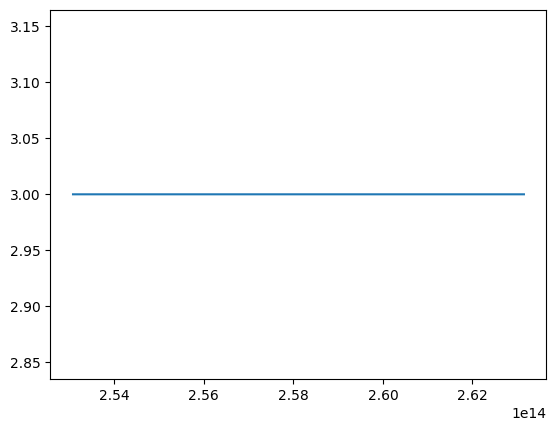

In [36]:
import matplotlib.pyplot as plt
plt.plot(timestamps,channels)

In [82]:
with open(f'Z:/YRF/Experiments/Imaging/Noise_testing/{param}/{int(rep_rate*1e3)}/details.txt', 'w') as f:
    print(f't_acq: {t_acq} seconds', file=f)
    print(f'rep rate = {rep_rate*1e3}kHz', file=f)
    print(f'laser power = {laser_power}mW', file=f)
    print(f'bin width = {bin_width*1e12}ps', file=f)
    print(f'avg noise count = {avg_noise_count} per second', file=f)

# np.savetxt(f'Z:/YRF/Experiments/Imaging/Noise_testing/{str(datetime.datetime.now()).replace(" ","_").replace(":","_")}_{delay}sec_{np.round(bin_width*c,2)}dres.txt',time_delay)

In [83]:
def hist(t, bin_width, nbins):
    
    global SPAD_CH, TRIG_CH, tagger
    # print('a0) ',time.time())
    bin_width*=1e12
    t*=1e12 #every time data converted to ps
    hist = Histogram(tagger, SPAD_CH, TRIG_CH, bin_width, nbins)
    hist.startFor(t) #60e12 #in ps
    while hist.isRunning():
        continue
    # print('b) ',time.time())    
    arr = np.array(hist.getData())
    return arr # returns x in picosecond

In [84]:
time_delay = []

for i in range(n_repeat):
    time_delay.append(hist(t_acq,bin_width,nbins))

time_delay = np.array(time_delay)
np.savetxt(f'Z:/YRF/Experiments/Imaging/Noise_testing/{param}/{int(rep_rate*1e3)}/{laser_power}mW_{bin_width*1e12}ps_{t_acq}s.txt',time_delay)

time_delay = []
n_acq = 10
t_acq = 1e-3
for i in range(n_acq):
    acq = hist(t_acq,bin_width,nbins)
    time_delay.append(acq)
time_delay = np.array(time_delay)